In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from collections import OrderedDict

In [11]:
Minecraft = pandas.read_csv("Minecraft_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
Cytus2 = pandas.read_csv("Cytus2_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
Cytus = pandas.read_csv("Cytus_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
FinalFantasy7 = pandas.read_csv("FinalFantasy7_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
HitmanSniper = pandas.read_csv("HitmanSniper_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
NBA2k19 = pandas.read_csv("NBA2k19_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")
SantaAndreas = pandas.read_csv("SantaAndreas_aver_ratings_by_countries_2017-12-21_to_2018-12-20.csv")

In [56]:
num_threshold = 100
t_Minecraft = Minecraft[Minecraft['total_ratings']>num_threshold]
t_Cytus2 = Cytus2[Cytus2['total_ratings']>num_threshold]
t_Cytus = Cytus[Cytus['total_ratings']>num_threshold]
t_FinalFantasy7 = FinalFantasy7[FinalFantasy7['total_ratings']>num_threshold]
t_HitmanSniper = HitmanSniper[HitmanSniper['total_ratings']>num_threshold]
t_NBA2k19 = NBA2k19[NBA2k19['total_ratings']>num_threshold]
t_SantaAndreas = SantaAndreas[SantaAndreas['total_ratings']>num_threshold]

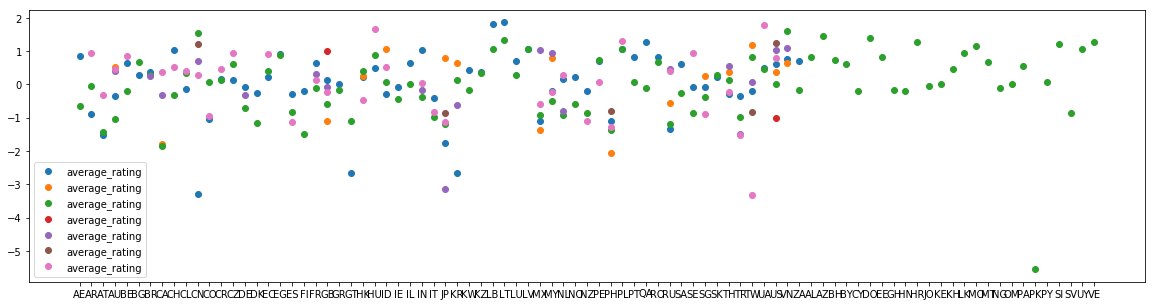

In [75]:
plt.figure(figsize=[20,5])
games = [t_Minecraft, t_Cytus2, t_Cytus, t_FinalFantasy7, t_HitmanSniper, t_NBA2k19, t_SantaAndreas]
country_rating = {c:[] for c in all_countries}
for game in games:
    ratings = game['average_rating'].tolist()
    mean = sum(ratings)/len(ratings)
    std = np.std(ratings)
    norm_ratings = (game['average_rating']-mean)/std
    for c in game['country']:
        country_rating[c].append(norm_ratings[game['country']==c].tolist()[0])
    plt.plot(game['country'],norm_ratings,'o')
plt.legend()

In [67]:
countries = []
for game in games:
    countries += game['country'].tolist()
    
all_countries = []
for c in countries:
    if c not in all_countries:
        all_countries.append(c)

In [85]:
country_rating = OrderedDict(country_rating.items())

<Container object of 87 artists>

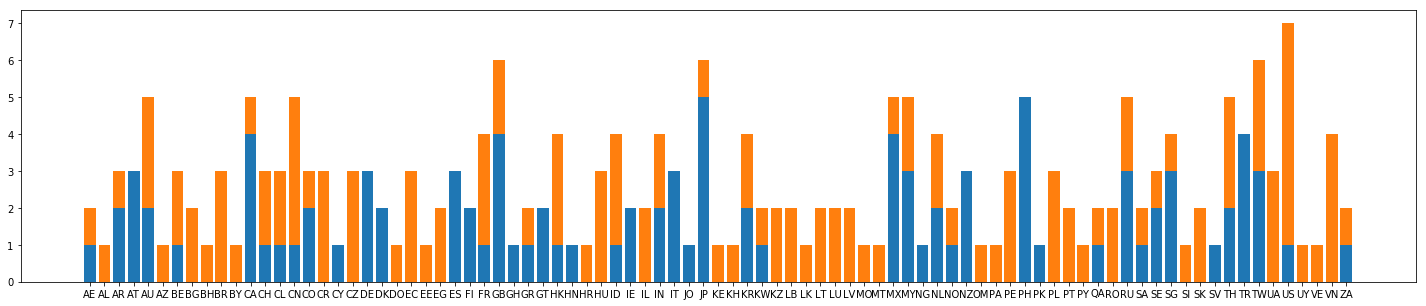

In [99]:
plt.figure(figsize=[25,5])
pos_nums = [len([num for num in nums if num>0]) for nums in country_rating.values()]
neg_nums = [len([num for num in nums if num<0]) for nums in country_rating.values()]
ind = country_rating.keys()
plt.bar(ind,neg_nums)
plt.bar(ind,pos_nums,bottom=neg_nums)

In [106]:
Minecraft[Minecraft['country'] == "US"]

,country,country_name,one_star,two_star,three_star,four_star,five_star,average_rating,total_ratings,new_one_star,...,new_four_star,new_five_star,new_average_rating,new_total_ratings,positive,negative,neutral,new_postive,new_negative,new_neutral
111,US,United States,10547,3548,5742,12164,84031,4.34,116032,7501,...,9127,64675,4.38,87873,96195,14095,5742,73802,9960,4111


[-3.3011206623782288,
 1.5554082908526088,
 0.713686802192364,
 1.2080928246294278,
 0.2732379728800393]